In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Data_fraud.csv')
df.head(5)

,STATUS,AGE,INCOME,OWNERSHIP,EMP_LENGTH,INTENT,AMOUNT,INT_RATE,PC_INCOME,PREV_DEFAULT,HIST_CREDIT,RATING
0,1,22,59000,RENT,123,PERSONAL,35000,16.02,0.59,Y,3,D
1,0,21,9600,OWN,5,EDUCATION,1000,11.14,0.10,N,2,B
2,1,25,9600,MORTGAGE,1,MEDICAL,5500,12.87,0.57,N,3,C
3,1,23,65500,RENT,4,MEDICAL,35000,15.23,0.53,N,2,C
4,1,24,54400,RENT,8,MEDICAL,35000,14.27,0.55,Y,4,C


In [3]:
print(df.shape)

(32581, 12)


Exploratory Data Analysis

In [4]:
#missing values
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
    else:
        print("No missing Values Found")

No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found
No missing Values Found


In [5]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  8


['STATUS',
 'AGE',
 'INCOME',
 'EMP_LENGTH',
 'AMOUNT',
 'INT_RATE',
 'PC_INCOME',
 'HIST_CREDIT']

In [6]:
# list of categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['OWNERSHIP', 'INTENT', 'PREV_DEFAULT', 'RATING']

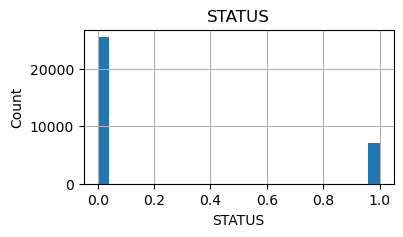

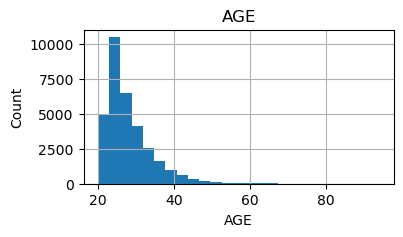

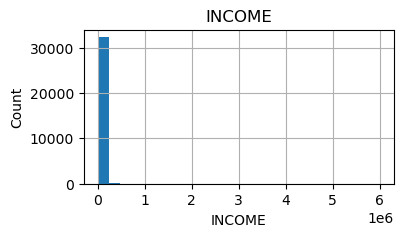

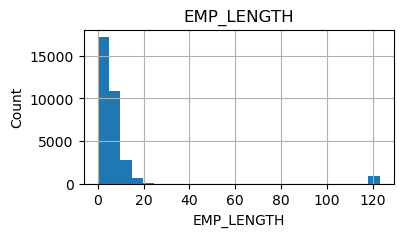

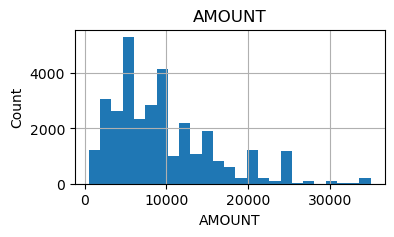

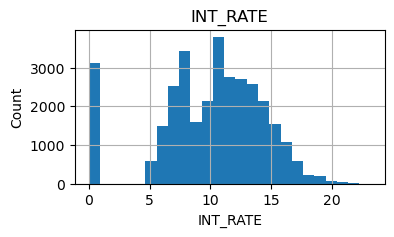

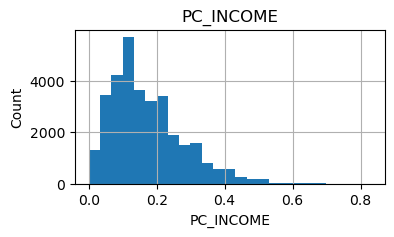

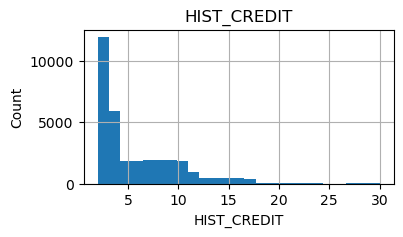

In [7]:
for feature in numerical_features:
    data = df.copy()
    plt.figure(figsize=(4,2))  # Adjust the width and height as needed
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

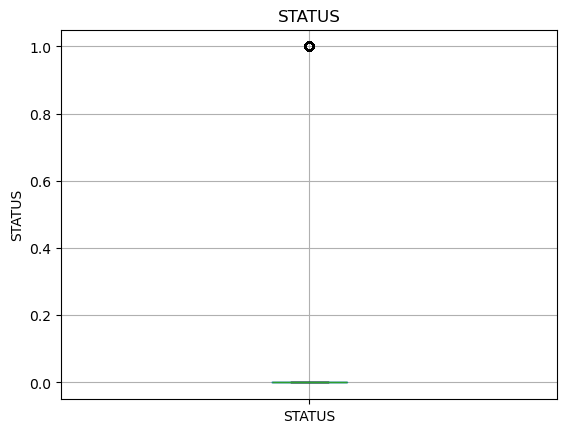

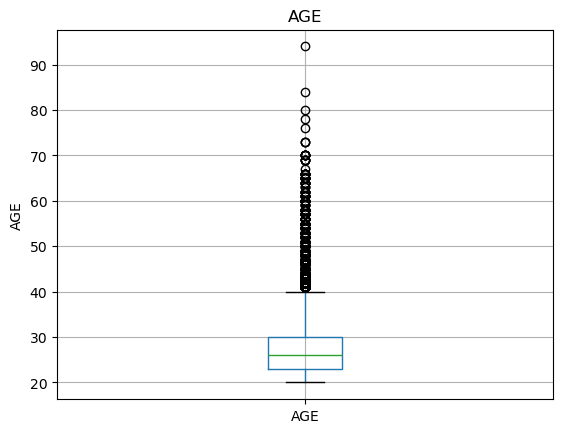

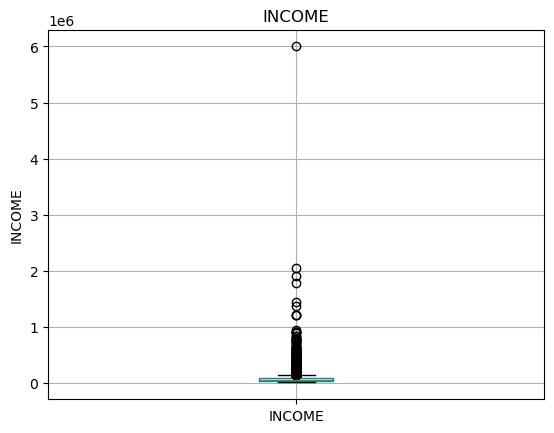

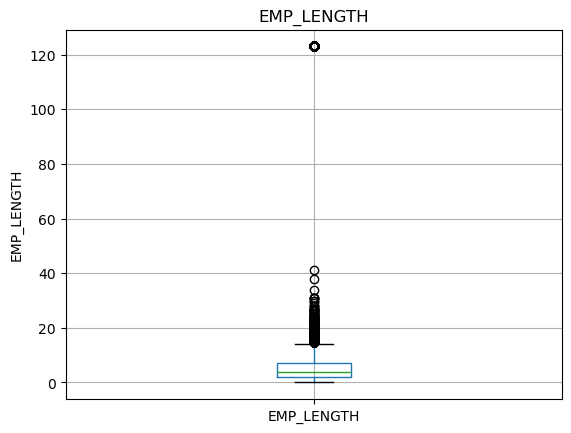

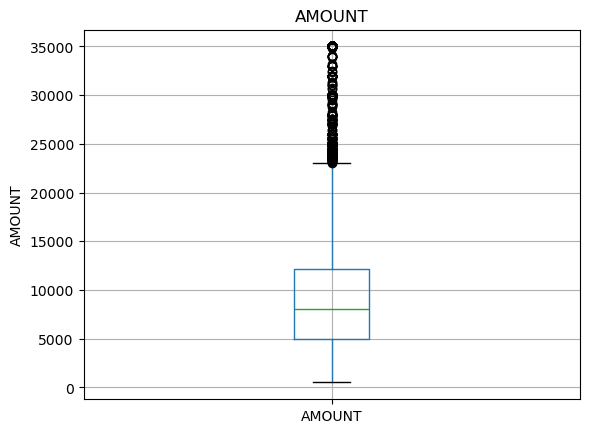

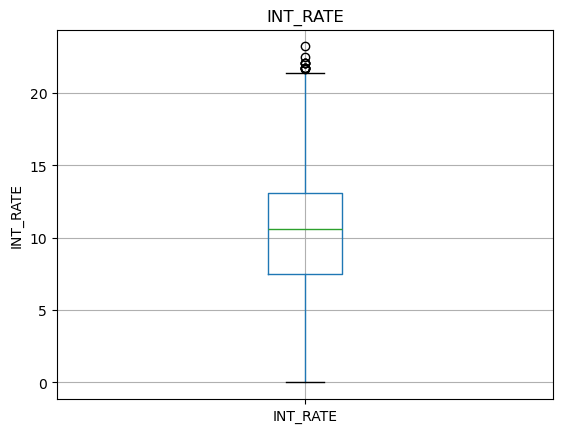

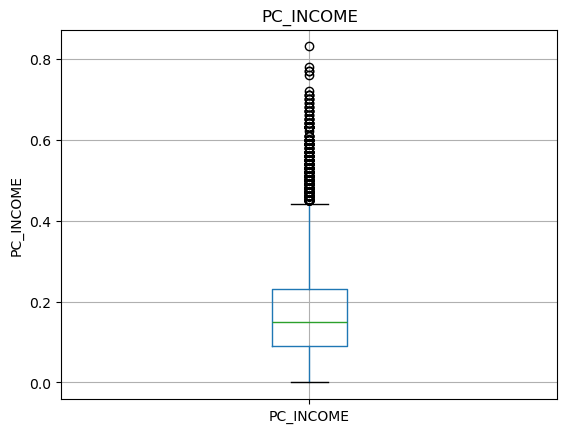

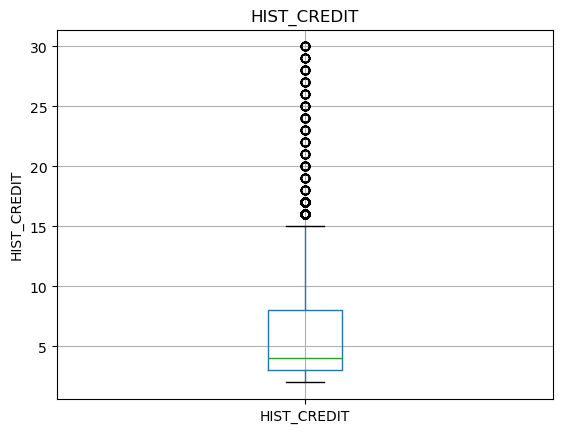

In [8]:
for feature in numerical_features:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Skipping feature STATUS because it contains zero values
Processing feature AGE


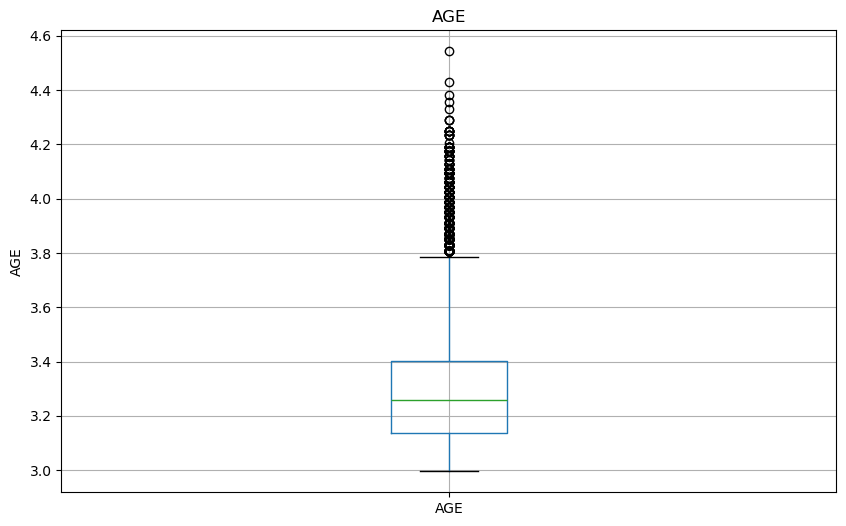

Processing feature INCOME


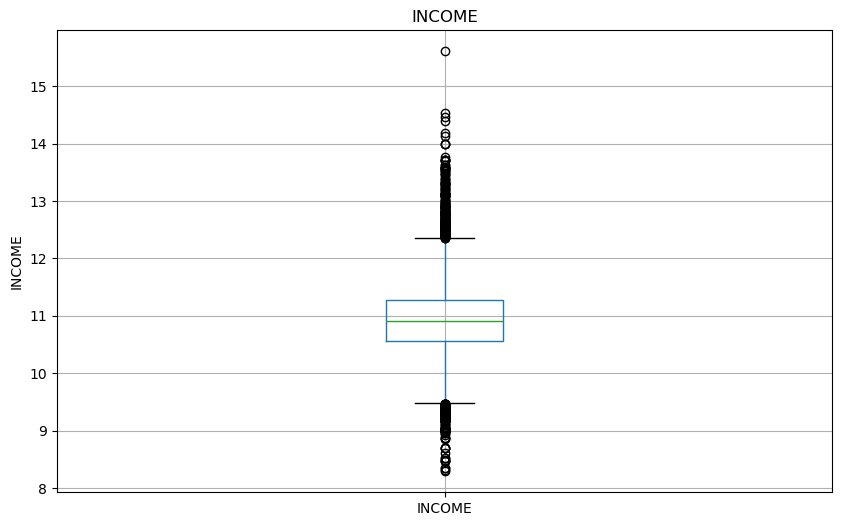

Skipping feature EMP_LENGTH because it contains zero values
Processing feature AMOUNT


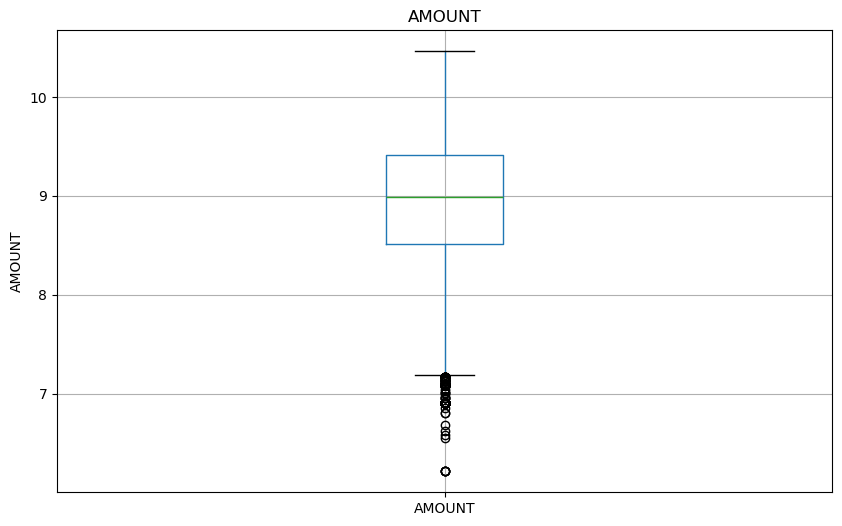

Skipping feature INT_RATE because it contains zero values
Skipping feature PC_INCOME because it contains zero values
Processing feature HIST_CREDIT


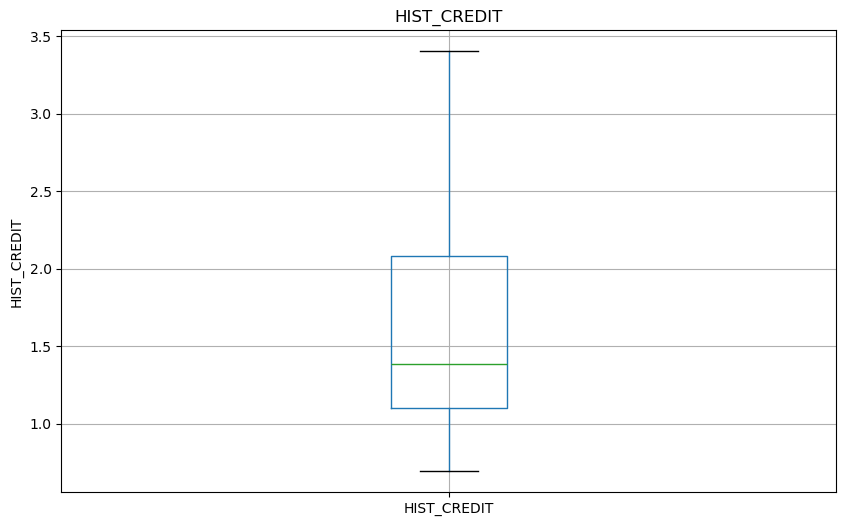

In [9]:
#Detecting Outliers by Boxplot
for feature in numerical_features:
    data = df.copy()
    if 0 in data[feature].unique():
        print(f"Skipping feature {feature} because it contains zero values")
        pass
    else:
        print(f"Processing feature {feature}")
        data[feature] = np.log(data[feature])
        plt.figure(figsize=(10, 6))  # Adjust the size as needed
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

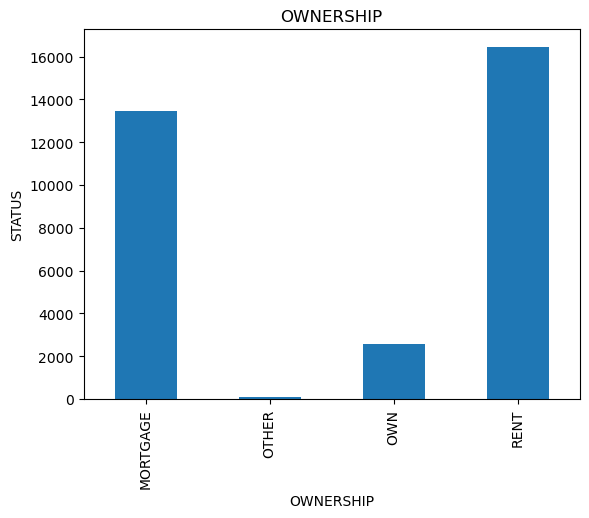

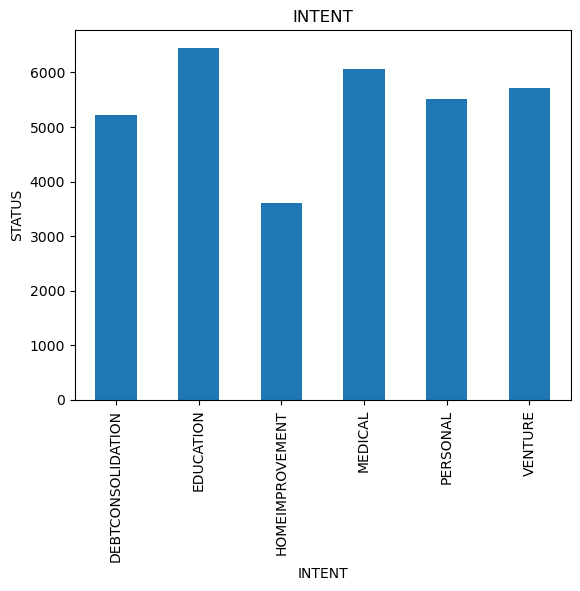

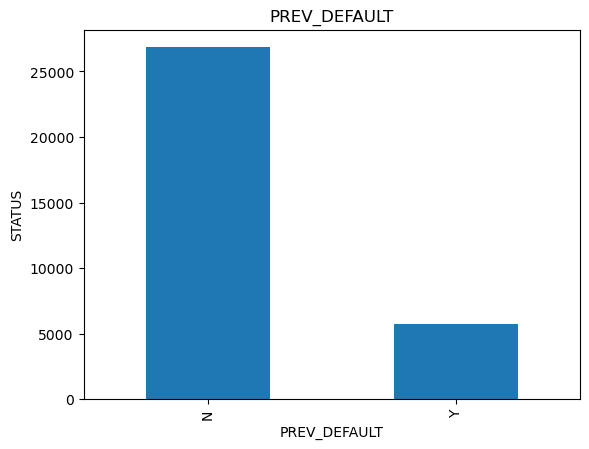

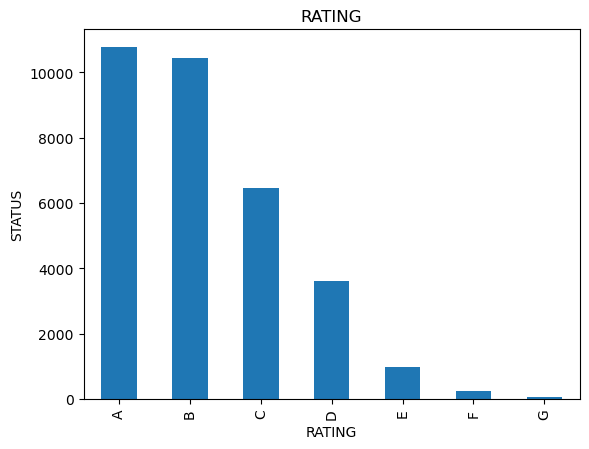

In [10]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['STATUS'].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('STATUS')
    plt.title(feature)
    plt.show()
        

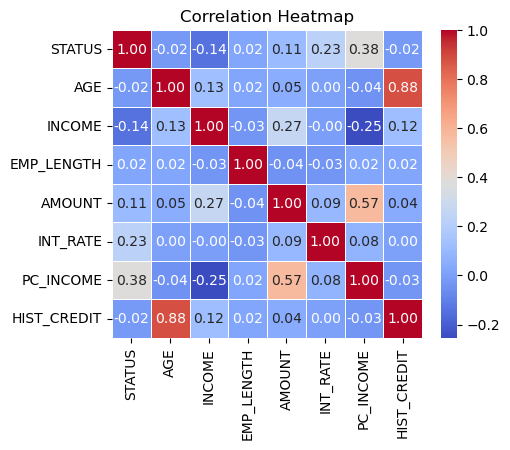

In [23]:
# Calculate the correlation matrix
corr_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from scipy.stats import chi2_contingency

# Dictionary to store results
chi_square_results = {}

for var in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(df[var], df['STATUS'])
    
    # Perform Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the results
    chi_square_results[var] = {'Chi2': chi2, 'p-value': p}

# Print the results
for var, result in chi_square_results.items():
    print(f'Variable: {var}')
    print(f"Chi2: {result['Chi2']}")
    print(f"p-value: {result['p-value']}\n")

Variable: OWNERSHIP
Chi2: 1907.980698188821
p-value: 0.0

Variable: INTENT
Chi2: 520.5115614374077
p-value: 2.980681669776041e-110

Variable: PREV_DEFAULT
Chi2: 1044.4395947711112
p-value: 3.934660154785392e-229

Variable: RATING
Chi2: 5609.184186567319
p-value: 0.0



In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Convert 'Y' and 'N' to 1 and 0 in the 'PREV_DEFAULT' column
df['PREV_DEFAULT'] = df['PREV_DEFAULT'].map({'Y': 1, 'N': 0})
# List of numerical features excluding 'STATUS'
features_to_scale = [feature for feature in numerical_features if feature != 'STATUS']

# Create a copy of the DataFrame to avoid modifying the original one
df_minmax_scaled = df.copy()
df_standard_scaled = df.copy()

# Initialize the MinMaxScaler and StandardScaler
scaler_min = MinMaxScaler()
scaler_std = StandardScaler()

# Fit and transform the MinMaxScaler on the selected features
df_minmax_scaled[features_to_scale] = scaler_min.fit_transform(df[features_to_scale])

# Fit and transform the StandardScaler on the selected features
df_standard_scaled[features_to_scale] = scaler_std.fit_transform(df[features_to_scale])

# Create dummy variables for categorical features
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True).astype(int)

# Add the dummy variables to the scaled DataFrames
df_minmax_scaled = pd.concat([df_minmax_scaled, df_dummies], axis=1)
df_standard_scaled = pd.concat([df_standard_scaled, df_dummies], axis=1)

# If you want to include the STATUS column in the scaled DataFrames (already included above)
df_minmax_scaled['STATUS'] = df['STATUS']
df_standard_scaled['STATUS'] = df['STATUS']

In [12]:
df_minmax_scaled = df_minmax_scaled.drop(categorical_features, axis = 1)
df_minmax_scaled

,STATUS,AGE,INCOME,EMP_LENGTH,AMOUNT,INT_RATE,PC_INCOME,HIST_CREDIT,OWNERSHIP_OTHER,OWNERSHIP_OWN,OWNERSHIP_RENT,INTENT_EDUCATION,INTENT_HOMEIMPROVEMENT,INTENT_MEDICAL,INTENT_PERSONAL,INTENT_VENTURE,RATING_B,RATING_C,RATING_D,RATING_E,RATING_F,RATING_G
0,1,0.027027,0.009173,1.000000,1.000000,0.689922,0.710843,0.035714,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,0.013514,0.000934,0.040650,0.014493,0.479759,0.120482,0.000000,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0.067568,0.000934,0.008130,0.144928,0.554264,0.686747,0.035714,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,0.040541,0.010257,0.032520,1.000000,0.655900,0.638554,0.000000,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,0.054054,0.008406,0.065041,1.000000,0.614556,0.662651,0.071429,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,0.500000,0.008172,0.008130,0.153623,0.566753,0.132530,1.000000,0,0,0,0,0,0,1,0,0,1,0,0,0,0
32577,0,0.459459,0.019346,0.032520,0.496377,0.322567,0.180723,0.607143,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32578,1,0.608108,0.012008,0.024390,1.000000,0.473299,0.554217,0.928571,0,0,1,0,1,0,0,0,1,0,0,0,0,0
32579,0,0.486486,0.024350,0.040650,0.420290,0.494401,0.120482,0.857143,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [13]:
df_standard_scaled = df_standard_scaled.drop(categorical_features, axis = 1)
df_standard_scaled

,STATUS,AGE,INCOME,EMP_LENGTH,AMOUNT,INT_RATE,PC_INCOME,HIST_CREDIT,OWNERSHIP_OTHER,OWNERSHIP_OWN,OWNERSHIP_RENT,INTENT_EDUCATION,INTENT_HOMEIMPROVEMENT,INTENT_MEDICAL,INTENT_PERSONAL,INTENT_VENTURE,RATING_B,RATING_C,RATING_D,RATING_E,RATING_F,RATING_G
0,1,-0.921495,-0.114143,5.824575,4.019404,1.355931,3.931411,-0.691554,0,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,-1.082616,-0.911147,-0.153669,-1.358650,0.264287,-0.657458,-0.938167,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,1,-0.438130,-0.911147,-0.356321,-0.646849,0.651284,3.744110,-0.691554,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,-0.760373,-0.009274,-0.204332,4.019404,1.179210,3.369508,-0.938167,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,1,-0.599252,-0.188358,-0.001679,4.019404,0.964460,3.556809,-0.444942,0,0,1,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0,4.717759,-0.210945,-0.356321,-0.599395,0.716156,-0.563808,5.966992,0,0,0,0,0,0,1,0,0,1,0,0,0,0
32577,0,4.234394,0.870011,-0.204332,1.271060,-0.552209,-0.189207,3.254251,0,0,0,0,0,0,1,0,0,0,0,0,0,0
32578,1,6.006731,0.160129,-0.254995,4.019404,0.230732,2.713956,5.473767,0,0,1,0,1,0,0,0,1,0,0,0,0,0
32579,0,4.556637,1.354021,-0.153669,0.855843,0.340344,-0.657458,4.980541,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [14]:
# Save the Standard scaled DataFrame to a CSV file
#df_standard_scaled.to_csv("Fraud_std.csv", index=False)

# Save the MinMax scaled DataFrame to a CSV file
#df_minmax_scaled.to_csv("Fraud_minmax.csv", index=False)


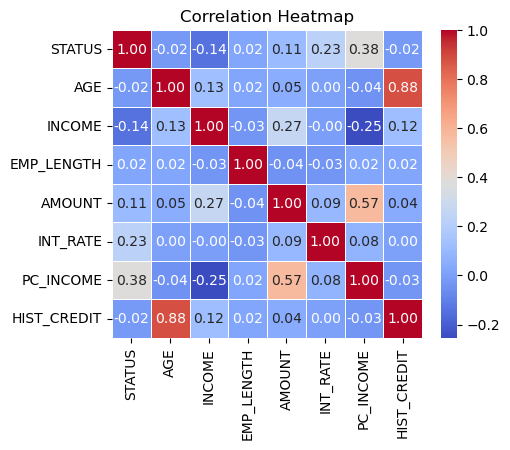

Variable: OWNERSHIP
Chi2: 1907.980698188821
p-value: 0.0

Variable: INTENT
Chi2: 520.5115614374077
p-value: 2.980681669776041e-110

Variable: PREV_DEFAULT
Chi2: 1044.4395947711112
p-value: 3.934660154785392e-229

Variable: RATING
Chi2: 5609.184186567319
p-value: 0.0

